# Assignmnet 1
## Model Selection (Part 1)

In [68]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matr = []
Y = []

In [69]:
# Read the data 
data = pd.read_csv("Datasets/Dataset_1_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
data.columns = cols
data.head()


,x,y
0,0.516220,1.609671
1,0.850085,14.814006
2,-0.840629,-8.738649
3,0.227433,-0.274344
4,-0.649508,-8.683412


In [70]:
x = data['x']
y = data['y']

In [71]:
plt.scatter(x,y)
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")

Text(0,0.5,'y')

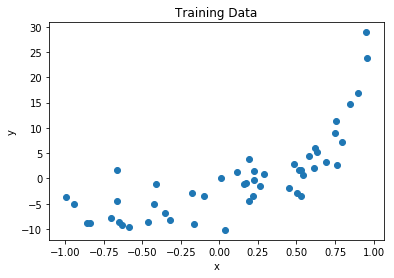

In [72]:
plt.show()

In [73]:
matr = []
for a in x:
    row =[]
    for p in range(20,-1,-1): 
        row = row + [a**(p)]
    matr = matr + [row]  

In [74]:
#Initialization for X, X^T and Y.
Y=[]
for i in y:
    Y = Y +[[i]]
    
X = np.array(matr) 
XT = X.transpose() 

### $$ W^* = (X^TX)^{-1}X^TY$$

### Using the formula we derived from class, we get the following parameters for the polynomial

In [75]:
# Get the parameters
A = np.dot(XT,X)
A1 = np.matrix(A)
A_I = A1.I
XTX = np.dot(A_I,XT)
W = np.dot(XTX,Y)
# Get the Transpose because its easier to use as a row vector
WT = W.transpose()
print("The polynomial coefficients are:")
print(WT)
# flatten the list.
p = WT.tolist()[0]
# Define the polynomial
Poly = np.poly1d(p)


The polynomial coefficients are:
[[ -2.00505258e+06   4.23312419e+05   9.08050592e+06  -2.08514474e+06
   -1.73694623e+07   4.28762157e+06   1.82475060e+07  -4.78970342e+06
   -1.14608154e+07   3.16229062e+06   4.38942640e+06  -1.25484346e+06
   -1.00186949e+06   2.90183572e+05   1.27183831e+05  -3.57491027e+04
   -7.74437812e+03   1.91012644e+03   1.55802528e+02  -1.55057617e+01
   -3.90624607e+00]]


### Get the new Y values

In [76]:
X = np.arange(-1,0.98, 0.001)

# get the new y
new_y = [Poly(i) for i in x ]
# get the new y for sorted x.
plt_y = [Poly(i) for i in X ]

## Calculate The training MSE

In [77]:
sigma = 0
for i in range(len(new_y)):
    sigma = sigma + (new_y[i] - y[i])**2 
print("The Training mean square error is:",sigma/len(y))

The Training mean square error is: 6.47474592081


### Read the Validation data 

In [78]:
valid = pd.read_csv("Datasets/Dataset_1_valid.csv",header=-1,usecols=range(2))
cols = ["x","y"]
valid.columns = cols
#data.head()
u = valid['x']
v = valid['y']

## calculate the validation MSE

In [79]:
new_v = [Poly(i) for i in u ]
sigma = 0
for i in range(len(new_v)):
    sigma = sigma + (new_v[i] - v[i])**2 
print("The validation mean square error is:",sigma/len(v))

The validation mean square error is: 1418.50796451


#### Curve Fit with Training data 

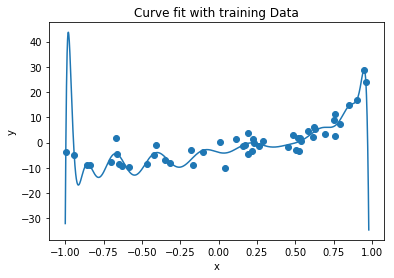

In [80]:
plt.scatter(x,y, label="Training data")
plt.plot(X,plt_y,label="curve")
plt.title("Curve fit with training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

 ## TEST CURVE FIT

In [81]:
test = pd.read_csv("Datasets/Dataset_1_test.csv", header = -1,usecols=range(2))
cols = ["x","y"]
test.columns = cols
test.head() 

,x,y
0,-0.335254,-2.953401
1,0.122457,-5.836786
2,-0.819361,-9.321124
3,-0.860443,-3.800950
4,0.422628,2.100318


##### Get the test values and plot it

In [82]:
X = np.arange(-1,0.985, 0.001 )
Y = [Poly(i) for i in X ]

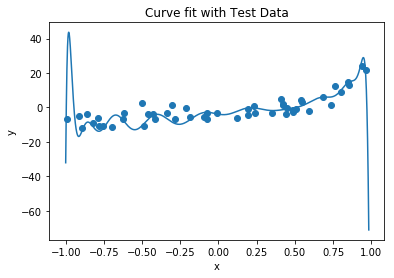

In [83]:
plt.plot(X,Y)
plt.scatter(test['x'],test['y'])
plt.title("Curve fit with Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Model Selection (Part 2)

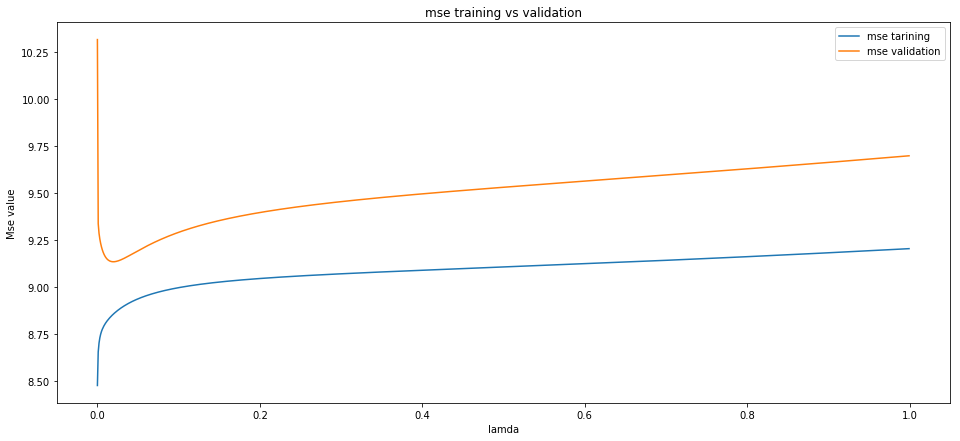

In [84]:
data = pd.read_csv("Datasets/Dataset_1_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
data.columns = cols
data.head()

matr = []
for a in x:
    row =[]
    for p in range(20,-1,-1): 
        row = row + [a**(p)]
    matr = matr + [row]  
    
Y=[]
for i in y:
    Y = Y +[[i]]
    
X = np.array(matr) 
XT = X.transpose() 
A = np.dot(XT,X)
A1 = np.matrix(A)


valid = pd.read_csv("Datasets/Dataset_1_valid.csv",header=-1,usecols=range(2))
cols = ["x","y"]
valid.columns = cols
#data.head()
u = valid['x']
v = valid['y']
MSE_t = []
MSE_v = []
val = 10
mini = sys.maxsize
lamda = 0.0001
while (lamda <= 1):
    # Get the polynomial coeffs
    Aw = np.matrix(A1+np.dot(lamda, np.identity(len(A1))))
    Q = Aw.I
    new_p = np.dot(np.dot(Q, XT),Y)
    q = np.poly1d(new_p.transpose().tolist()[0])
    
    #Get the new Y values for training and validation.
    yew = [q(i) for i in data['x']]
    vew = [q(i) for i in u]
    
    # calculate The MSE
    sigmat = 0
    for i in range(len(yew)):
        sigmat = sigmat + (yew[i] - data['y'][i])**2 
    MSE_t = MSE_t + [sigmat/len(yew)]
    
    
    sigmav = 0
    for i in range(len(vew)):
        sigmav = sigmav + (vew[i] - v[i])**2
    MSE_v = MSE_v + [sigmav/len(vew)]
    
    if (abs(sigmav - sigmat) < mini):
        mini = abs(sigmav - sigmat)
        val = lamda
        
    lamda = lamda + 0.001
lam = np.arange(0.0001,1, 0.001)
plt.figure(figsize=(16, 7))
plt.plot(lam, MSE_t, label="mse tarining")
plt.plot(lam, MSE_v, label="mse validation")
plt.title("mse training vs validation")
plt.xlabel("lamda")
plt.ylabel("Mse value")
plt.legend()
plt.show()

#### Focusing on the area with the best relationship.

In [85]:
axis = lam[0:int(len(lam)*0.1)]
train = MSE_t[0:int(len(lam)*0.1)]
valid = MSE_v[0:int(len(lam)*0.1)]


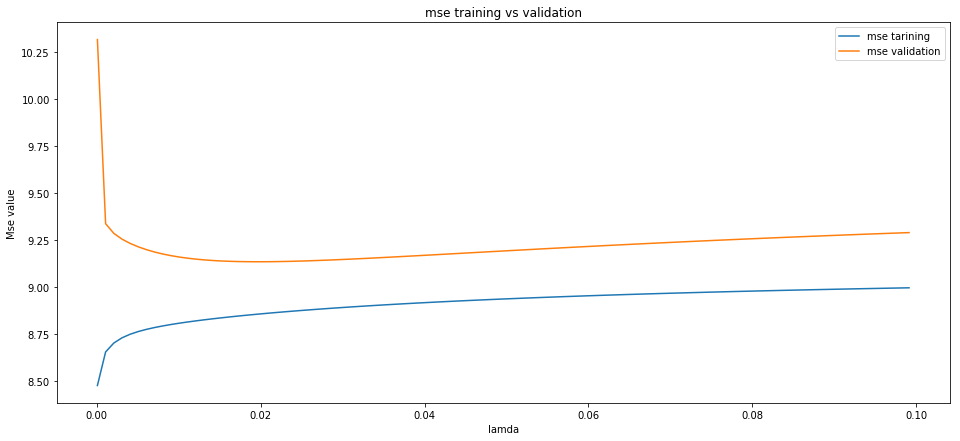

In [86]:
plt.figure(figsize=(16, 7))
plt.plot(axis, train, label="mse tarining")
plt.plot(axis, valid, label="mse validation")
plt.title("mse training vs validation")
plt.xlabel("lamda")
plt.ylabel("Mse value")
plt.legend()
plt.show()

## As we can see from the plot, the best lambda is around 0.2

# Visulazation of the curve using the test data.


In [87]:
test = pd.read_csv("Datasets/Dataset_1_test.csv", header = -1,usecols=range(2))
cols = ["x","y"]
test.columns = cols

Aw = np.matrix(A1+np.dot(0.02, np.identity(len(A1))))
Q = Aw.I
new_p = np.dot(np.dot(Q, XT),Y)
q = np.poly1d(new_p.transpose().tolist()[0])

Ax = np.arange(-1,1,0.0001)
T = [q(i) for i in Ax]

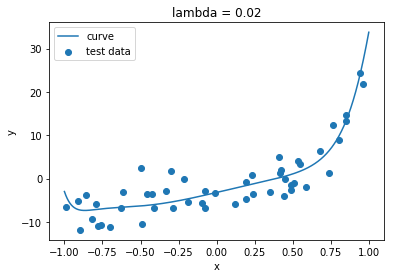

In [88]:
plt.scatter(test['x'],test['y'] , label='test data')
plt.plot(Ax,T, label='curve')
plt.title("lambda = 0.02")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()